# SMS-Spam Classifier

- This is a python application which will be designed with the help of Machine Learning Models and Classification Models with the help of which we will be able to predict the spam messages which are recieved on the phone.

## Importing Libraries 

In [63]:
#The Normal Imports 
import numpy as np
import pandas as pd

#Matplotlib Library
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud

import re
import nltk
#nltk.download('punkt')
#nltk.download('stopwords')
#Command to make all the graphs appear on the iPython Notebook
%matplotlib inline
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
    


## Data Cleaning

- Importing the Dataset.

In [64]:
dataset=pd.read_csv('/media/prajjawal/COLLEGE/SEM_VI/Minor-II/spam.csv',encoding='latin-1')

In [65]:
dataset

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
11126,ham,You are a great role model. You are giving so ...,NaN,NaN,NaN
11127,ham,"Awesome, I remember the last time we got someb...",NaN,NaN,NaN
11128,spam,"If you don't, your prize will go to another cu...",NaN,NaN,NaN
11129,spam,"SMS. ac JSco: Energy is high, but u may not kn...",NaN,NaN,NaN


- Remove unwanted columns which are not needed and renaming columns to make data more readable.
- First column is label and second column is text. First column contains which message is ham/spam.
- Second column contains the message

In [66]:
dataset=dataset.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"],axis=1)
dataset=dataset.rename(columns={"v1" : "label","v2" : "text"})

In [67]:
dataset

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
11126,ham,You are a great role model. You are giving so ...
11127,ham,"Awesome, I remember the last time we got someb..."
11128,spam,"If you don't, your prize will go to another cu..."
11129,spam,"SMS. ac JSco: Energy is high, but u may not kn..."


In [68]:
dataset.count()

label    11131
text     11131
dtype: int64

In [69]:
dataset['label'].value_counts()

ham     9637
spam    1494
Name: label, dtype: int64

In [70]:
dataset.isnull().count()

label    11131
text     11131
dtype: int64

In [71]:
dataset.drop_duplicates(subset ="text", keep = 'first', inplace = True)
dataset=dataset.reset_index(drop=True)
dataset

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
6061,spam,For ur chance to win a Â£250 cash every wk TXT...
6062,ham,Ok lor thanx... u in school?
6063,ham,And stop wondering wow is she ever going to st...
6064,ham,"ER, ENJOYIN INDIANS AT THE MO..yeP. SaLL gOoD ..."


## Exploratory Data Analysis

- Let's compare the length of the spam and ham messages. So we will be adding an extra column of length and then we will be using it to plot histograms.
- So let's begin

In [72]:
dataset['length']=dataset['text'].map(lambda x: len(x))
dataset

,label,text,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
6061,spam,For ur chance to win a Â£250 cash every wk TXT...,123
6062,ham,Ok lor thanx... u in school?,28
6063,ham,And stop wondering wow is she ever going to st...,133
6064,ham,"ER, ENJOYIN INDIANS AT THE MO..yeP. SaLL gOoD ...",80


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd5807a7610>]],
      dtype=object)

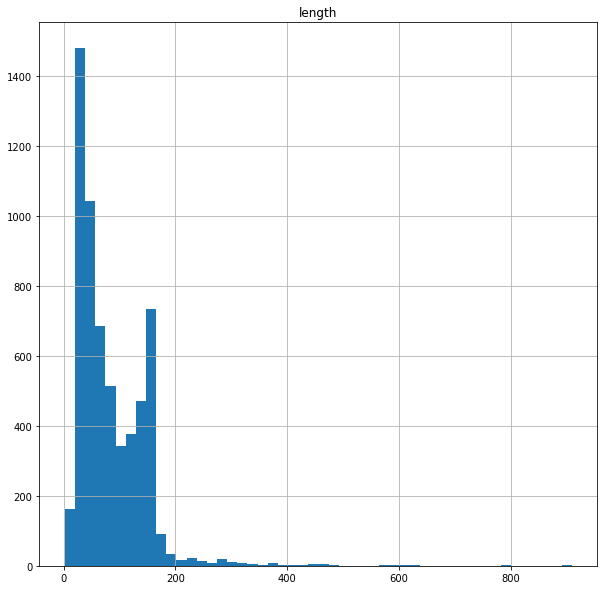

In [73]:
dataset.hist(column='length',bins=50,figsize=(10,10))


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd5807a7f10>,
      dtype=object)

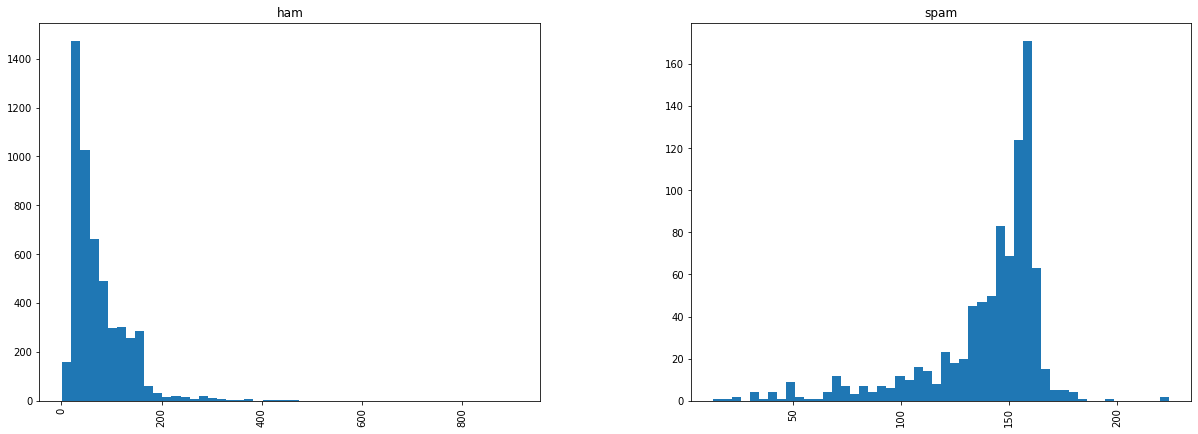

In [74]:
dataset.hist(column='length', by='label',bins=50,figsize=(20,7))

- <b>Wordcloud Representation</b>
    - Wordcloud is a useful visualization tool for you to have a rough estimate of the words that has the highest frequency in the data that you have.
    - So let's save the ham words and spam words in a string type variable.

In [75]:
ham_words=''
spam_words=''
for val in dataset[dataset['label']=='spam'].text:
    words=val.lower()
    token=nltk.word_tokenize(words)
    for word in token:
        spam_words=spam_words+word+' '

for val in dataset[dataset['label']=='ham'].text:
    words=val.lower()
    token=nltk.word_tokenize(words)
    for word in token:
        ham_words=ham_words+word+' '

<b>Spam Word Cloud</b>

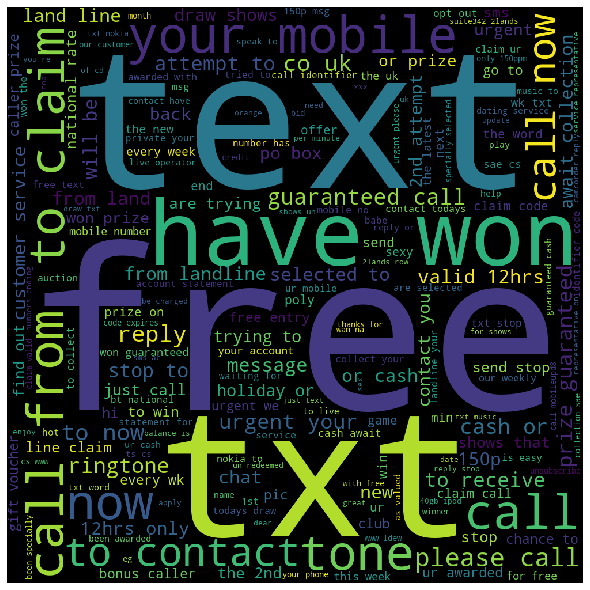

In [76]:
spamcloud=WordCloud(width=1000,height=1000).generate(spam_words)
plt.figure( figsize=(10,8), facecolor='w')
plt.imshow(spamcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

<b>Ham Word Cloud</b>

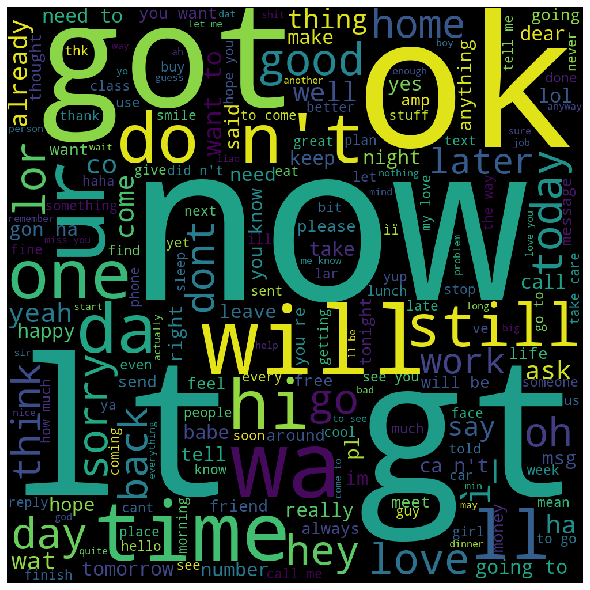

In [77]:
hamcloud=WordCloud(width=1000,height=1000).generate(ham_words)
plt.figure( figsize=(10,8), facecolor='w')
plt.imshow(hamcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [78]:
dataset['label']=dataset.replace(['ham','spam'],[0, 1]) 
dataset

,label,text,length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
6061,1,For ur chance to win a Â£250 cash every wk TXT...,123
6062,0,Ok lor thanx... u in school?,28
6063,0,And stop wondering wow is she ever going to st...,133
6064,0,"ER, ENJOYIN INDIANS AT THE MO..yeP. SaLL gOoD ...",80


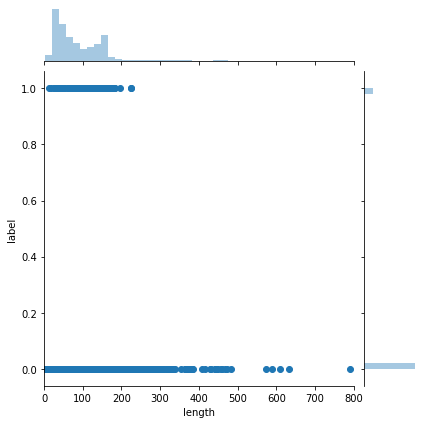

In [79]:
sns.jointplot(x='length',y='label',xlim=(0,800),data=dataset)

## Data Preprocessing

- Now after visualizing the data we came up to preprocess the data as it is important to make the model understand about the data and a model can also understand numeric language so it is necessary to make these words converted into integers.
- So we will import the `nltk` library to filter the unused data and after a bag of words is created we will be applying vectors concept in it.

In [80]:
#nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

- Firstly we download the package of stopwords which contains all the words which are not  required and just lead to bad predictions. So we remove these words from our dataset.
- Then we import that package of the stop words using the import keyword.
- After that we import the PorterStemmer class from NLTK library. We use this library to perform stemming.

<b>Stemming</b>
- Stemming is definitely the simpler of the two approaches. With stemming, words are reduced to their word stems. A word stem need not be the same root as a dictionary-based morphological root, it just is an equal to or smaller form of the word
- For example, we may have a suffix rule that, based on a list of known suffixes, cuts them off. In the English language, we have suffixes like “-ed” and “-ing” which may be useful to cut off in order to map the words “cook,” “cooking,” and “cooked” all to the same stem of “cook.”

In [81]:
for i in range(0, dataset.index[-1]+1):
    review = re.sub('[^a-zA-Z]', ' ', dataset['text'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    dataset['text'][i]=review

In [82]:
dataset

,label,text,length
0,0,go jurong point crazi avail bugi n great world...,111
1,0,ok lar joke wif u oni,29
2,1,free entri wkli comp win fa cup final tkt st m...,155
3,0,u dun say earli hor u c alreadi say,49
4,0,nah think goe usf live around though,61
...,...,...,...
6061,1,ur chanc win cash everi wk txt action c www mo...,123
6062,0,ok lor thanx u school,28
6063,0,stop wonder wow ever go stop tm ing tm whenev ...,133
6064,0,er enjoyin indian mo yep sall good hehe how bo...,80


- Now after the data is completely processed we need to convert these words in to vectors such that the words are represented by numbers, so in order to do it we have two types of Vectorizer:-
    - <b>Count Vectorizer</b>
        - In the following the count of word is stored in the matrix of total number of words by total number of messages.
        - In some cases of count if a word is coming multiple times then it may give biased results as the word count will be greater leading to inappropriate predictions. So to solve the problem we came up with another vectorizer that is <b>TFIDF vectorizer</b>.

In [83]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X_Count_Vector = cv.fit_transform(dataset['text'])
y = dataset.iloc[:, 0].values
y=y.astype('int64')

In [84]:
X_Count_Vector.shape

(6066, 6298)

## Train-Test Split

- Splitting the dataset into <b>Training Set</b> and <b>Test Set</b>.
- Model will be trained on the basis of training set and after the model is trained it will be tested on the Test Set.
- Accuracy will be calculated on the basis of how many predictions are done right by the model on Test Set

In [85]:
from sklearn.model_selection import train_test_split
Xcv_train, Xcv_test, y_train, y_test = train_test_split(X_Count_Vector, y, test_size = 0.20, random_state = 0)

In [86]:
print(Xcv_train.shape)
print(Xcv_test.shape)
print(y_train.shape)
print(y_test.shape)
y_train

(4852, 6298)
(1214, 6298)
(4852,)
(1214,)


array([0, 0, 0, ..., 0, 0, 0])

## Classification Using CountVectorizer()

- So now here we are training our model with the trained set by using pre-built Classifiers such as:-
    - Logistic Regression
    - K-Nearest Neighbors
    - Support Vector Machines
    - Decision Tree Classification
    - Random Forest Classification
    - Multinomial Naive Bayes
- So our training set is being trained on each model and so we predict the accuracies by predicting the Test Data. 

In [102]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

In [103]:
# Logistic Regressor
logisticregressor = LogisticRegression()
# KNN Classifier
KNeighborsClassifier = KNeighborsClassifier(n_neighbors=49)
# SVC Classifier
SupportVectorKernel = SVC(kernel='sigmoid', gamma=1.0)
# Decison Tree Classifier
DecisionTreeClassification = DecisionTreeClassifier(min_samples_split=7)
# Random Forest Classifier
RandomForestClassification = RandomForestClassifier(n_estimators=31)
# Multinomial Naive Bayes
NaiveBayes = MultinomialNB(alpha=0.2)
#XGBoost Classifier
XGBoost=XGBClassifier()

In [104]:
classifiers = {'Logistic Regression': logisticregressor,'K-Nearest Neighbors':KNeighborsClassifier,'Support Vector Machine': SupportVectorKernel,'Decision Tree Classifier': DecisionTreeClassification,'Random Forest Classification': RandomForestClassification,'Naive Bayes':NaiveBayes,'XGBoost':XGBoost}

In [105]:
def train(classifier, features, targets):    
    classifier.fit(features, targets)

def predict(classifier, features):
    return (classifier.predict(features))

In [106]:
predicted_accuracy = []
for model,classifier in classifiers.items():
    train(classifier, X_train, y_train)
    pred = predict(classifier, X_test)
    predicted_accuracy.append((model, accuracy_score(y_test , pred)*100))

In [107]:
predictions = pd.DataFrame(predicted_accuracy, columns=['Model','Score'])
predictions

,Model,Score
0,Logistic Regression,97.940692
1,K-Nearest Neighbors,84.514003
2,Support Vector Machine,90.774300
3,Decision Tree Classifier,97.364086
4,Random Forest Classification,98.187809
5,Naive Bayes,97.364086
6,XGBoost,97.528830


Text(0.5, 1.0, 'Distribution by Classifier')

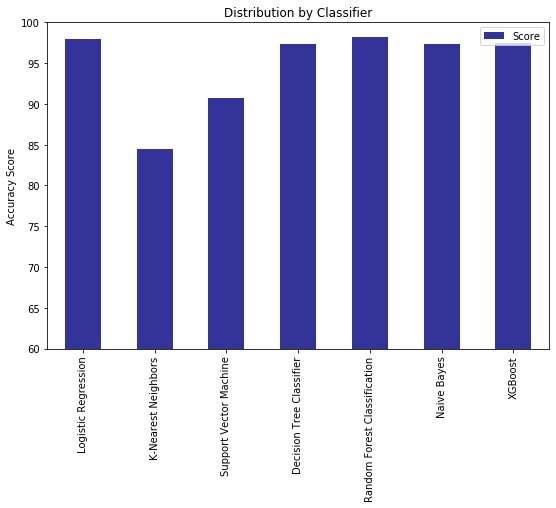

In [109]:
predictions.plot(kind='bar', ylim=(60,100), figsize=(9,6), align='center', colormap="terrain")
plt.xticks(np.arange(7),predictions.Model)
plt.ylabel('Accuracy Score')
plt.title('Distribution by Classifier')

## TFIDF Vectorization
- TFIDF is made of two words:-
    - **TF (Term Frequency)**
        - The number of times a word appears in a document divded by the total number of words in the document.
        - Every document has its own term frequency.
        ![image](https://qph.fs.quoracdn.net/main-qimg-d83a5b9b2057ed7e9251da444a5725d7)
     - **IDF (Inverse Document Frequency)**
        - The log of the number of documents divided by the number of documents that contain the word w. 
        - Inverse data frequency determines the weight of rare words across all documents in the corpus.
        ![image-1](https://miro.medium.com/proxy/1*A5YGwFpcTd0YTCdgoiHFUw.png)
- Lastly, the TF-IDF is simply the TF multiplied by IDF.
     ![image-2](https://miro.medium.com/proxy/1*nSqHXwOIJ2fa_EFLTh5KYw.png)
- So in Python we use the **TfidfVectorizer** to generate a Tfidf values matrix. It is present in scikit.feature_extraction.text Module.

In [110]:
from sklearn.feature_extraction.text import TfidfVectorizer
Tfidfvectorizer = TfidfVectorizer()
XTfidf_Vector = Tfidfvectorizer.fit_transform(dataset['text'])

In [111]:
XTfidf_Vector.shape

(6066, 6298)

## Train-Test Split

- Splitting the dataset into <b>Training Set</b> and <b>Test Set</b>.
- Model will be trained on the basis of training set and after the model is trained it will be tested on the Test Set.
- Accuracy will be calculated on the basis of how many predictions are done right by the model on Test Set

In [112]:
from sklearn.model_selection import train_test_split
XTfidf_train,XTfidf_test= train_test_split(XTfidf_Vector,test_size = 0.20 , random_state=0)

## Classification Using TFIDFVectorizer()

- So now here we are training our model with the trained set by using pre-built Classifiers such as:-
    - Logistic Regression
    - K-Nearest Neighbors
    - Support Vector Machines
    - Decision Tree Classification
    - Random Forest Classification
    - Multinomial Naive Bayes
    - XGBoost Algorithm
- So our training set is being trained on each model and so we predict the accuracies by predicting the Test Data. 

In [113]:
Tfidf_predicted_accuracy = []
for model,classifier in classifiers.items():
    train(classifier, XTfidf_train, y_train)
    pred = predict(classifier, XTfidf_test)
    Tfidf_predicted_accuracy.append((model, accuracy_score(y_test , pred)*100))

In [114]:
Tfidfpredictions = pd.DataFrame(Tfidf_predicted_accuracy, columns=['Model','Score'])
Tfidfpredictions

,Model,Score
0,Logistic Regression,95.881384
1,K-Nearest Neighbors,93.739703
2,Support Vector Machine,97.611203
3,Decision Tree Classifier,96.787479
4,Random Forest Classification,98.105437
5,Naive Bayes,97.858320
6,XGBoost,97.364086


Text(0.5, 1.0, 'Distribution by Classifier')

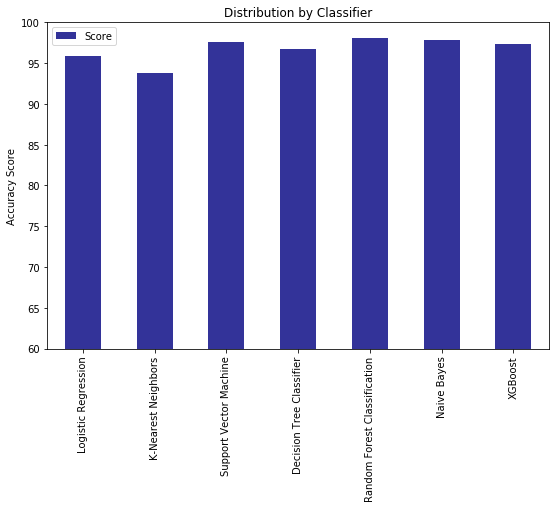

In [116]:
Tfidfpredictions.plot(kind='bar', ylim=(60,100), figsize=(9,6), align='center', colormap="terrain")
plt.xticks(np.arange(7),Tfidfpredictions.Model)
plt.ylabel('Accuracy Score')
plt.title('Distribution by Classifier')

In [133]:
def deduce(i):
    if i==1:
        return "SPAM Message"
    else:
        return "Not SPAM Message"
            


In [138]:
vectorizer = Tfidfvectorizer
text1 = ["I am totally fine"]
text2 = ["No. I meant the calculation is the same. That I'll call later"]
text3 = ["Had your contract mobile 11 Mnths? Latest Motorola Now"]
text4 = ["WINNER!! You just won a free ticket to Bahamas. Send your Details"]

integers1 = vectorizer.transform(text1)
integers2 = vectorizer.transform(text2)
integers3 = vectorizer.transform(text3)
integers4 = vectorizer.transform(text4)

In [139]:
p1 = NaiveBayes.predict(integers1)[0]
p2 = NaiveBayes.predict(integers2)[0]
p3 = NaiveBayes.predict(integers3)[0]
p4 = NaiveBayes.predict(integers4)[0]

In [140]:
print(deduce(p1),deduce(p2),deduce(p3),deduce(p4))

Not SPAM Message Not SPAM Message SPAM Message SPAM Message
